In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Vars de Controle

In [259]:
path = 'final.csv'
drop = [0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30]
prever = [0, 1, -1] #Indices do novo DF!!!

Globais

In [260]:
normalizer = -1

# Iniciando / Droppando colunas

In [261]:
df = pd.read_csv(path)
df.columns

Index(['Unnamed: 0', 'Name', 'Cases', 'Deaths', 'Code', 'Latitude',
       'Longitude', 'Population', 'Area', 'Demographic_Density',
       'Access to electricity (% of population)',
       'Adjusted net national income per capita (current US$)',
       'Air transport, passengers carried', 'Children out of school, primary',
       'Current health expenditure per capita (current US$)',
       'Domestic private health expenditure per capita (current US$)',
       'Employers, total (% of total employment) (modeled ILO estimate)',
       'GNI, Atlas method (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'Government expenditure on education, total (% of GDP)',
       'Hospital beds (per 1,000 people)',
       'Incidence of tuberculosis (per 100,000 people)',
       'Individuals using the Internet (% of population)',
       'International tourism, number of arrivals',
       'Life expectancy at birth, total (years)',
       'Nurses and midwives (per 1,000 people)'

In [262]:
df.drop(df.columns[drop], axis=1, inplace=True)
cs = df.columns

In [230]:
df

,Cases,Deaths,Demographic_Density,"Hospital beds (per 1,000 people)",Population ages 65 and above (% of total population),Urban population (% of total population)
0,9267,646,16.962382,1.9,6.362497,72.629
1,84,4,20.749178,0.8,2.216374,65.514
2,16214,528,15.677744,5.0,11.117789,91.870
3,8927,127,100.675789,4.2,11.253818,63.149
4,7192,103,3.135372,3.8,15.656475,86.012
...,...,...,...,...,...,...
117,852,46,98.628952,0.4,2.966556,42.055
118,6,0,406.685783,4.7,19.196193,91.490
119,279,4,142.069056,1.3,2.645435,16.937
120,479,12,194.352697,2.9,2.925678,72.803


# Normalizando

In [231]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(df)
df = normalizer.transform(df)
df = pd.DataFrame(df, columns = cs)

# Treinando

1° Prever

In [ ]:
from sklearn.model_selection import train_test_split

In [253]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(df.columns[prever], axis=1), 
                                                    df.iloc[:,prever[0]], test_size=0.30)

In [254]:
from sklearn.linear_model import LinearRegression
lm0 = LinearRegression()
lm0.fit(x_train, y_train)
predict = lm0.predict(x_test)

lm0.coef_

array([-0.42313745,  1.4419934 , -3.34656054, -0.29599728])

In [234]:
res = []
y_true = y_test.to_list()

mini =  999
maxi = -999

i = 0

for i in range(0, len(predict)):
    n = []
    
    n.append(y_true[i])
    n.append(predict[i])
    res.append(n)
    
    dif = abs(y_true[i] - predict[i])
    
    if dif < mini:
        mini = dif
    if dif > maxi:
        maxi = dif
    
print(mini)
print(maxi)
print(res)

0.0019237643562585172
0.25386614671847185
[[0.5825960677934162, 0.32872992107494436], [0.9977260869250566, 0.9958023225687981], [0.9929389155546422, 0.9447619625975707], [0.9998093393181493, 1.0281765166618062], [0.9990533270705534, 1.0360213740089963], [0.9898880638416813, 1.0397195619947106], [0.998330947749758, 1.0404524333985672], [0.9626785132449622, 0.8238086271281839], [0.9558033822899726, 0.8405721984548116], [0.9752186141203976, 0.9116074031402852], [0.9809081928662192, 0.855064749119061], [0.9804763656554136, 0.8957984524118271], [0.44874142544593487, 0.6300126404601123], [0.9984137370322346, 1.0079325234802043], [0.9962824820522002, 1.0387455343937255], [0.011997710282383483, 0.16623415013950738], [0.998120409825835, 0.9890784083518641], [0.8245115078467217, 0.7019494617180864], [0.9936330518238382, 1.0400356288201058], [0.9980459219146721, 1.0343299893680797], [0.9517576759254114, 0.895943398915894], [0.9965184563113291, 0.9555966951082608], [0.9981265532115411, 1.036369169

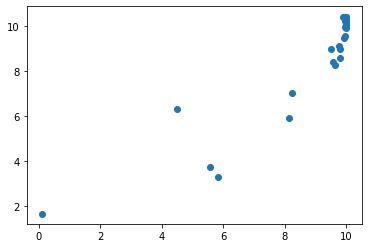

In [235]:
plt.scatter(y_test * 10, predict * 10)

2° Prever

In [250]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(df.columns[prever], axis=1), 
                                                    df.iloc[:,prever[1]], test_size=0.30)

In [251]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(x_train, y_train)
predict = lm1.predict(x_test)

lm1.coef_

array([-0.04648107, -0.81670471, -0.07441948,  0.00894677])

In [238]:
res = []
y_true = y_test.to_list()

mini =  999
maxi = -999

i = 0

for i in range(0, len(predict)):
    n = []
    
    n.append(y_true[i])
    n.append(predict[i])
    res.append(n)
    
res

[[0.004504998576877225, 0.041901725846363556],
 [0.11760002572665441, 0.042137782984599366],
 [0.055490905394362224, 0.03655891357742823],
 [0.027959652691962177, 0.0415994176871642],
 [0.06565962568575046, 0.04144982405815408],
 [0.008036691521765685, 0.04059133981854315],
 [0.01834484995181934, 0.03261403603593463],
 [0.045836233462474577, 0.042012795213023806],
 [0.01431893879510385, 0.041687797476144976],
 [0.012821183584169569, 0.059469340991523185],
 [0.06091852202699547, 0.04205261739911905],
 [0.055063266542289546, 0.04154485730008951],
 [0.03331571262342732, 0.03998332349875536],
 [0.012042752772044195, 0.04171109976663883],
 [0.0015527235214268618, 0.03546145803420321],
 [0.0054970467103456315, 0.04179186271563523],
 [0.06608266246510038, 0.04194629261253316],
 [0.02534083620186718, 0.04202855167974772],
 [0.0728941356942453, 0.03326472402900297],
 [0.040870498495223145, 0.036718785290457426],
 [0.07785250173710113, 0.04220849664985308],
 [0.01162378817632561, 0.0403342162529

In [263]:
df

,Cases,Deaths,Demographic_Density,"Hospital beds (per 1,000 people)",Population ages 65 and above (% of total population),Urban population (% of total population)
0,9267,646,16.962382,1.9,6.362497,72.629
1,84,4,20.749178,0.8,2.216374,65.514
2,16214,528,15.677744,5.0,11.117789,91.870
3,8927,127,100.675789,4.2,11.253818,63.149
4,7192,103,3.135372,3.8,15.656475,86.012
...,...,...,...,...,...,...
117,852,46,98.628952,0.4,2.966556,42.055
118,6,0,406.685783,4.7,19.196193,91.490
119,279,4,142.069056,1.3,2.645435,16.937
120,479,12,194.352697,2.9,2.925678,72.803


# Classificando novos dados

In [265]:
def classify(dd, hb, pa, up):
    df_test = normalizer.transform([[dd, hb, pa, up]])
    predict = lm0.predict(df_test)
    
    menorDiferenca = 9999
    resulMaisProximo = 0
    
    for i in range(0, len(df.index)-1):
        dife = 0
        
        for ii in range(3, len(df.columns) - 3):
            dife += abs(df.iloc[i, ii] - predict[ii])
            
        if dife < menorDiferenca:
            menorDiferenca = dife
            resulMaisProximo = df.iloc[i, 2]
            
    return resulMaisProximo